In [1]:
import numpy as np
#from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.decomposition import TruncatedSVD, PCA
import matplotlib.pyplot as plt
import seaborn as sns
#import umap 


In [2]:
#Set seed
seed=42

In [3]:
def Visual_comp(data_t,n_var,clusters,tag):
    #Plot first two components of given reduction algorithm and colors points according to given cluster
    col=[]
    for i in range(1,n_var+1):
        name='Component_'+str(i)
        col.append(name)
    pc_df = pd.DataFrame(data =data_t , columns =col ) 
    pc_df['Cluster'] =clusters
    pc_df.head()
    #plot pca
    sns.lmplot( x="Component_1", y="Component_2",
    data=pc_df, 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='Cluster', # color by cluster
    legend=True,
    scatter_kws={"s": 80}).set(title='First two components of '+tag)
  
    return pc_df

# Load METABRIC

Load data from metabric:

* Exprexpression dat

* CNV


In [4]:
#Expression
data_exp=pd.read_csv("/CTGlab/data/brca_metabric/data_mrna_illumina_microarray_zscores_ref_diploid_samples.txt",sep='\t')
#CNV
data_cnv=pd.read_csv("/CTGlab/data/brca_metabric/data_cna.txt",sep='\t')

In [5]:
data_exp

,Hugo_Symbol,Entrez_Gene_Id,MB-0362,MB-0346,MB-0386,MB-0574,MB-0185,MB-0503,MB-0641,MB-0201,...,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313,MB-4823
0,RERE,473,-0.7139,1.2266,-0.0053,-0.4399,-0.5958,0.4729,0.4974,-1.1900,...,-0.4596,1.8975,1.1120,1.1942,-1.7974,1.1339,0.0259,-0.3529,-1.2327,1.7217
1,RNF165,494470,-0.4606,0.3564,-0.6800,-1.0563,-0.0377,-0.6829,-0.2854,-0.4336,...,-1.0927,0.9103,-0.0023,-0.2898,3.5763,1.3429,0.5726,0.1731,0.5482,1.2239
2,PHF7,51533,-0.3325,-1.0617,0.2587,-0.2982,-1.2422,0.0558,-0.5011,-0.6418,...,-0.0725,0.7219,0.1402,0.8718,-0.9275,-0.0587,0.5240,-0.0311,4.4925,-0.2173
3,CIDEA,1149,-0.0129,-1.0394,3.2991,-0.2632,-1.0949,1.2628,2.0796,-0.8310,...,0.0679,-0.7126,-0.1523,-0.7593,-0.7141,-0.4324,-0.0336,-0.4003,2.4698,-0.7268
4,TENT2,167153,-0.7853,0.0337,-0.6649,2.1640,-0.2031,1.0304,0.6046,-1.7557,...,0.6400,-0.1102,1.2719,0.8178,-1.0301,0.6082,0.5608,2.4222,-3.2853,0.4181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20598,VPS72,6944,-0.2908,0.3443,0.4818,0.2503,-0.1057,-0.1657,-0.4730,1.4719,...,-0.9195,-1.4857,-1.4543,0.3791,-0.3989,-1.5529,-0.6349,-0.8160,-1.0902,-0.2811
20599,CSMD3,114788,-0.5286,-0.4379,6.9258,1.0466,-0.1060,0.3284,0.0993,-0.1987,...,-0.3776,-0.6366,-0.0607,-0.0475,0.2231,0.0706,0.1188,-0.3231,-0.1251,-0.4265
20600,CC2D1A,54862,0.0068,-0.7520,0.0519,0.2502,-0.3376,-0.4705,-0.6036,-1.1946,...,-0.5877,-1.1169,-0.5420,0.2947,-0.2800,2.5337,-0.8272,-0.1200,4.2708,-1.0090
20601,IGSF9,57549,0.4053,1.2968,0.7962,-0.1634,-0.2418,-0.2545,-0.9814,1.9240,...,-0.6217,-1.5481,-1.2088,0.4594,0.3821,0.3254,0.8187,-0.5648,0.5931,0.9043


Load meta data (Clinical data)

In [6]:
data_clin=pd.read_csv("/CTGlab/data/brca_metabric/data_clinical_sample.txt",sep='\t',skiprows=4)

In [7]:
data_clin.set_index('SAMPLE_ID',inplace=True)

In [8]:
data_clin

,PATIENT_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,ER_STATUS,HER2_STATUS,GRADE,ONCOTREE_CODE,PR_STATUS,SAMPLE_TYPE,TUMOR_SIZE,TUMOR_STAGE,TMB_NONSYNONYMOUS
SAMPLE_ID,,,,,,,,,,,,
MB-0000,MB-0000,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Negative,Primary,22.0,2.0,0.000000
MB-0002,MB-0002,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,Primary,10.0,1.0,2.615035
MB-0005,MB-0005,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,Primary,15.0,2.0,2.615035
MB-0006,MB-0006,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,2.0,MDLC,Positive,Primary,25.0,2.0,1.307518
MB-0008,MB-0008,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,3.0,MDLC,Positive,Primary,40.0,2.0,2.615035
...,...,...,...,...,...,...,...,...,...,...,...,...
MTS-T2428,MTS-T2428,Breast Cancer,Invasive Breast Carcinoma,Positive,NaN,1.0,BRCA,NaN,Primary,27.0,1.0,2.615035
MTS-T2429,MTS-T2429,Breast Cancer,Invasive Breast Carcinoma,Positive,NaN,2.0,BRCA,NaN,Primary,28.0,2.0,5.230071
MTS-T2430,MTS-T2430,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,BRCA,NaN,Primary,NaN,0.0,7.845106


In [9]:
#bind index colums
data_exp['hugo_entrez_combo']=data_exp.Hugo_Symbol+'_'+data_exp.Entrez_Gene_Id.astype(str)
data_cnv['hugo_entrez_combo']=data_cnv.Hugo_Symbol+'_'+data_cnv.Entrez_Gene_Id.astype(str)
data_exp.drop(['Hugo_Symbol','Entrez_Gene_Id'],axis=1,inplace=True)
data_cnv.drop(['Hugo_Symbol','Entrez_Gene_Id'],axis=1,inplace=True)

Select samples presentin both datasets

In [10]:
samples=list(set(data_exp.columns) & set(data_cnv.columns))
data_exp_sub=data_exp[samples]
data_cnv_sub=data_cnv[samples]
samples.remove('hugo_entrez_combo')

In [11]:
data_clin=data_clin[data_clin.index.isin(samples)]


In [12]:
print('RNA data dim:',data_exp_sub.shape)
print('CNA data dim:',data_cnv_sub.shape)

RNA data dim: (20603, 1981)
CNA data dim: (22544, 1981)


In [13]:
gene_com_id=list(set(data_exp_sub.hugo_entrez_combo) & set(data_cnv_sub.hugo_entrez_combo))
print('common features: ',len(gene_com_id))

common features:  0


In [14]:
data_exp_sub.drop('hugo_entrez_combo',axis=1).describe()

,MB-7099,MB-2848,MB-0532,MB-4332,MB-5534,MB-5272,MB-7164,MB-0655,MB-5470,MB-7059,...,MB-2969,MB-0248,MB-5107,MB-0581,MB-7275,MB-3272,MB-5431,MB-5636,MB-7060,MB-5427
count,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,...,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000
mean,-0.016726,-0.000058,-0.005893,0.175839,-0.039132,-0.022983,-0.049589,-0.049490,-0.017428,-0.011050,...,0.006904,0.027505,0.033438,0.029456,-0.052073,0.007961,-0.005026,0.011695,0.023399,-0.004893
std,0.942211,0.924755,0.914962,1.638914,0.873254,0.908764,0.787005,0.952719,0.870690,0.903253,...,0.883507,1.016698,0.989726,1.065372,0.858832,1.025199,0.990242,1.015836,1.043826,1.231753
min,-4.229300,-3.474300,-3.660700,-5.380700,-4.687400,-3.547800,-3.338700,-4.281800,-3.459100,-3.695000,...,-4.146800,-4.351400,-4.075200,-4.425700,-3.729500,-4.085400,-5.273300,-3.643000,-4.102600,-5.128000
25%,-0.653800,-0.595550,-0.615400,-0.887000,-0.608850,-0.617400,-0.581750,-0.671400,-0.598400,-0.614200,...,-0.577500,-0.682700,-0.654300,-0.663600,-0.634550,-0.648700,-0.646650,-0.673900,-0.690800,-0.788450
50%,-0.101600,-0.052500,-0.066700,0.035600,-0.108600,-0.108100,-0.091800,-0.111500,-0.062000,-0.083500,...,-0.050700,-0.063500,-0.037100,-0.075400,-0.112200,-0.071000,-0.082800,-0.086300,-0.064500,-0.137600
75%,0.559500,0.548900,0.566600,1.147800,0.466700,0.493800,0.441100,0.511650,0.537050,0.521000,...,0.569100,0.650150,0.646950,0.616800,0.493700,0.579650,0.540500,0.601050,0.687950,0.618350
max,9.872000,7.423800,9.233900,12.977600,5.237500,6.812500,5.384400,17.822900,5.447800,10.878000,...,5.503900,7.656000,9.034900,12.609000,9.308600,20.095900,11.548700,7.930100,6.368500,15.121100


Reset index and replace nan values

In [15]:
#SET hugo+entrez as index
data_exp_sub.set_index('hugo_entrez_combo',inplace=True)
data_cnv_sub.set_index('hugo_entrez_combo',inplace=True)
#drop nan
if data_exp_sub.isnull().values.any():
    data_exp_sub=data_exp_sub.apply(lambda x: x.fillna(x.mean()),axis=0)

if data_cnv_sub.isnull().values.any():
    data_cnv_sub=data_cnv_sub.apply(lambda x: x.fillna(x.mean()),axis=0)

In [16]:
data_exp_sub.isnull().values.any()

False

## CNV Encoding

**TF-IDF**

Try using tf-idf transformation--> Normalization highly used in text document analysis which " weights " terms/features according to occurence-> if a term is less comon is more informative

In [17]:
sign_cnv=np.sign(data_cnv_sub)
abs_cnv=np.abs(sign_cnv)

In [18]:
transformer = TfidfTransformer(smooth_idf=True)
tdfidf_cnv=transformer.fit_transform(np.abs(data_cnv_sub.T))

# Dimensionality reduction

## PCA and SVD

We reduce each dataset separatelly and then take most relevant components from each one

In [19]:
n_comp=10

In [20]:
#For EXP
pca_exp= PCA(n_components=n_comp,random_state=seed,svd_solver='randomized')
pca_exp.fit(data_exp_sub.T)
X_pca_exp=pca_exp.transform(data_exp_sub.T)
print("X truncated is a sparse matrix with shape: %s" % str(X_pca_exp.shape))

#For CNV
pca_cnv= PCA(n_components=n_comp,random_state=seed,svd_solver='randomized')
pca_cnv.fit(data_cnv_sub.T)
X_pca_cnv=pca_cnv.transform(data_cnv_sub.T)
print("X truncated is a sparse matrix with shape: %s" % str(X_pca_cnv.shape))

#For CNV TF-IDF
svd_cnv=TruncatedSVD(n_components=n_comp,random_state=seed)
svd_cnv.fit(tdfidf_cnv)
X_svd_cnv=svd_cnv.transform(tdfidf_cnv)
print("X truncated is a sparse matrix with shape: %s" % str(X_svd_cnv.shape))

X truncated is a sparse matrix with shape: (1980, 10)
X truncated is a sparse matrix with shape: (1980, 10)
X truncated is a sparse matrix with shape: (1980, 10)


First 5 comp exp: 0.8184706586781052 % variance
7
First 5 comp cna: 0.7874343292139782 % variance
8
First 5 comp cna: 0.7549046056182338 % variance
8


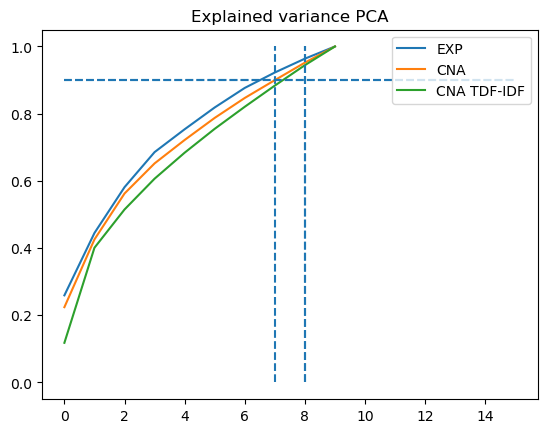

In [21]:
#For EXPR
ev_cumsum = np.cumsum(pca_exp.explained_variance_)/(pca_exp.explained_variance_).sum()
ev_at90 = ev_cumsum[ev_cumsum<0.9].shape[0]
print('First 5 comp exp: {} % variance'.format(ev_cumsum[5]))
print (ev_at90)
plt.title('Explained variance for expr PCA')
plt.plot(ev_cumsum,label='EXP')
plt.vlines(ev_at90, 0, 1, linestyles='dashed')




#For CNA
ev_cumsum= np.cumsum(pca_cnv.explained_variance_)/(pca_cnv.explained_variance_).sum()
ev_at90 = ev_cumsum[ev_cumsum<0.9].shape[0]
print('First 5 comp cna: {} % variance'.format(ev_cumsum[5]))
print (ev_at90)
plt.title('Explained variance PCA')
plt.plot(ev_cumsum,label='CNA')
plt.vlines(ev_at90, 0, 1, linestyles='dashed')
plt.hlines(0.9, 0, 15, linestyles='dashed')
plt.legend()


#For CNA TDF-IDF
ev_cumsum= np.cumsum(svd_cnv.explained_variance_)/(svd_cnv.explained_variance_).sum()
ev_at90 = ev_cumsum[ev_cumsum<0.9].shape[0]
print('First 5 comp cna: {} % variance'.format(ev_cumsum[5]))
print (ev_at90)
plt.title('Explained variance PCA')
plt.plot(ev_cumsum,label='CNA TDF-IDF')
plt.vlines(ev_at90, 0, 1, linestyles='dashed')
plt.hlines(0.9, 0, 15, linestyles='dashed')
plt.legend()


In [22]:
X_pca_cnv


array([[  7.4468465 ,  -4.5978075 ,  10.1795733 , ..., -27.35299711,
        -22.58907657,  10.21731575],
       [ 11.09442893,  -7.90211557,  12.10525685, ...,  11.02845333,
        -14.3305304 ,  17.65827509],
       [ 20.46605155,  25.07304498,   6.10538278, ...,  -3.26707549,
        -12.90687164,   2.08614434],
       ...,
       [ 42.0715713 ,  44.02278499,  29.59090244, ...,  -1.88273426,
         14.3670889 ,   4.87263005],
       [  4.28569552,  -5.75241684, -23.90105899, ..., -12.41175804,
         -3.32537089,   2.54017513],
       [ -6.2564881 ,  49.4725453 ,  -1.91377001, ..., -12.92944009,
        -14.30228985,  17.48015892]])

In [23]:
data_clin.ONCOTREE_CODE.unique()

array(['IDC', 'MDLC', 'ILC', 'BRCA', 'IMMC', 'PBS', 'BREAST', 'MBC'],
      dtype=object)

In [24]:
data_clin

,PATIENT_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,ER_STATUS,HER2_STATUS,GRADE,ONCOTREE_CODE,PR_STATUS,SAMPLE_TYPE,TUMOR_SIZE,TUMOR_STAGE,TMB_NONSYNONYMOUS
SAMPLE_ID,,,,,,,,,,,,
MB-0000,MB-0000,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Negative,Primary,22.0,2.0,0.000000
MB-0002,MB-0002,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,Primary,10.0,1.0,2.615035
MB-0005,MB-0005,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,Primary,15.0,2.0,2.615035
MB-0006,MB-0006,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,2.0,MDLC,Positive,Primary,25.0,2.0,1.307518
MB-0008,MB-0008,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,3.0,MDLC,Positive,Primary,40.0,2.0,2.615035
...,...,...,...,...,...,...,...,...,...,...,...,...
MB-7295,MB-7295,Breast Cancer,Breast Invasive Lobular Carcinoma,Positive,Negative,3.0,ILC,Positive,Primary,25.0,NaN,5.230071
MB-7296,MB-7296,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Positive,3.0,IDC,Negative,Primary,20.0,NaN,7.845106
MB-7297,MB-7297,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,Primary,25.0,NaN,5.230071


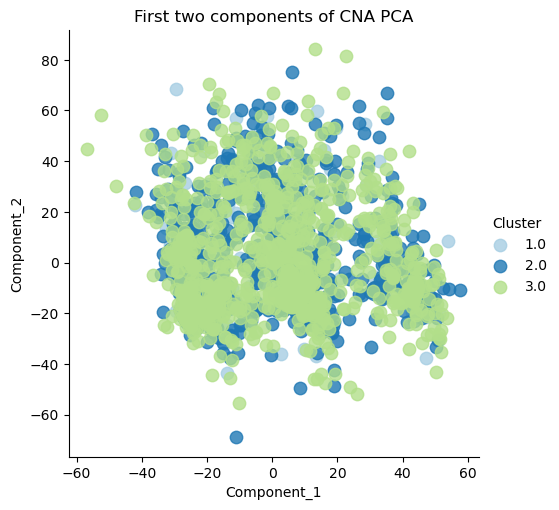

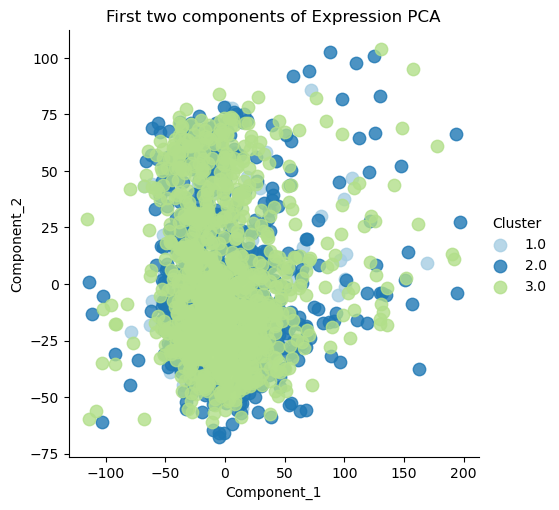

In [25]:
df_pca_cna=Visual_comp(X_pca_cnv,10,list(data_clin.GRADE),tag='CNA PCA')
df_pca_exp=Visual_comp(X_pca_exp,10,list(data_clin.GRADE),tag='Expression PCA')


Merge datasets and Save file


In [26]:
df_pca_cna.set_index(data_cnv_sub.columns,inplace=True)
df_pca_exp.set_index(data_exp_sub.columns,inplace=True)

In [27]:
df_pca_cna.columns[:4:-1]

Index(['Cluster', 'Component_10', 'Component_9', 'Component_8', 'Component_7',
       'Component_6'],
      dtype='object')

In [28]:
col=['Cluster', 'Component_1', 'Component_2', 'Component_3', 'Component_4',
       'Component_5']

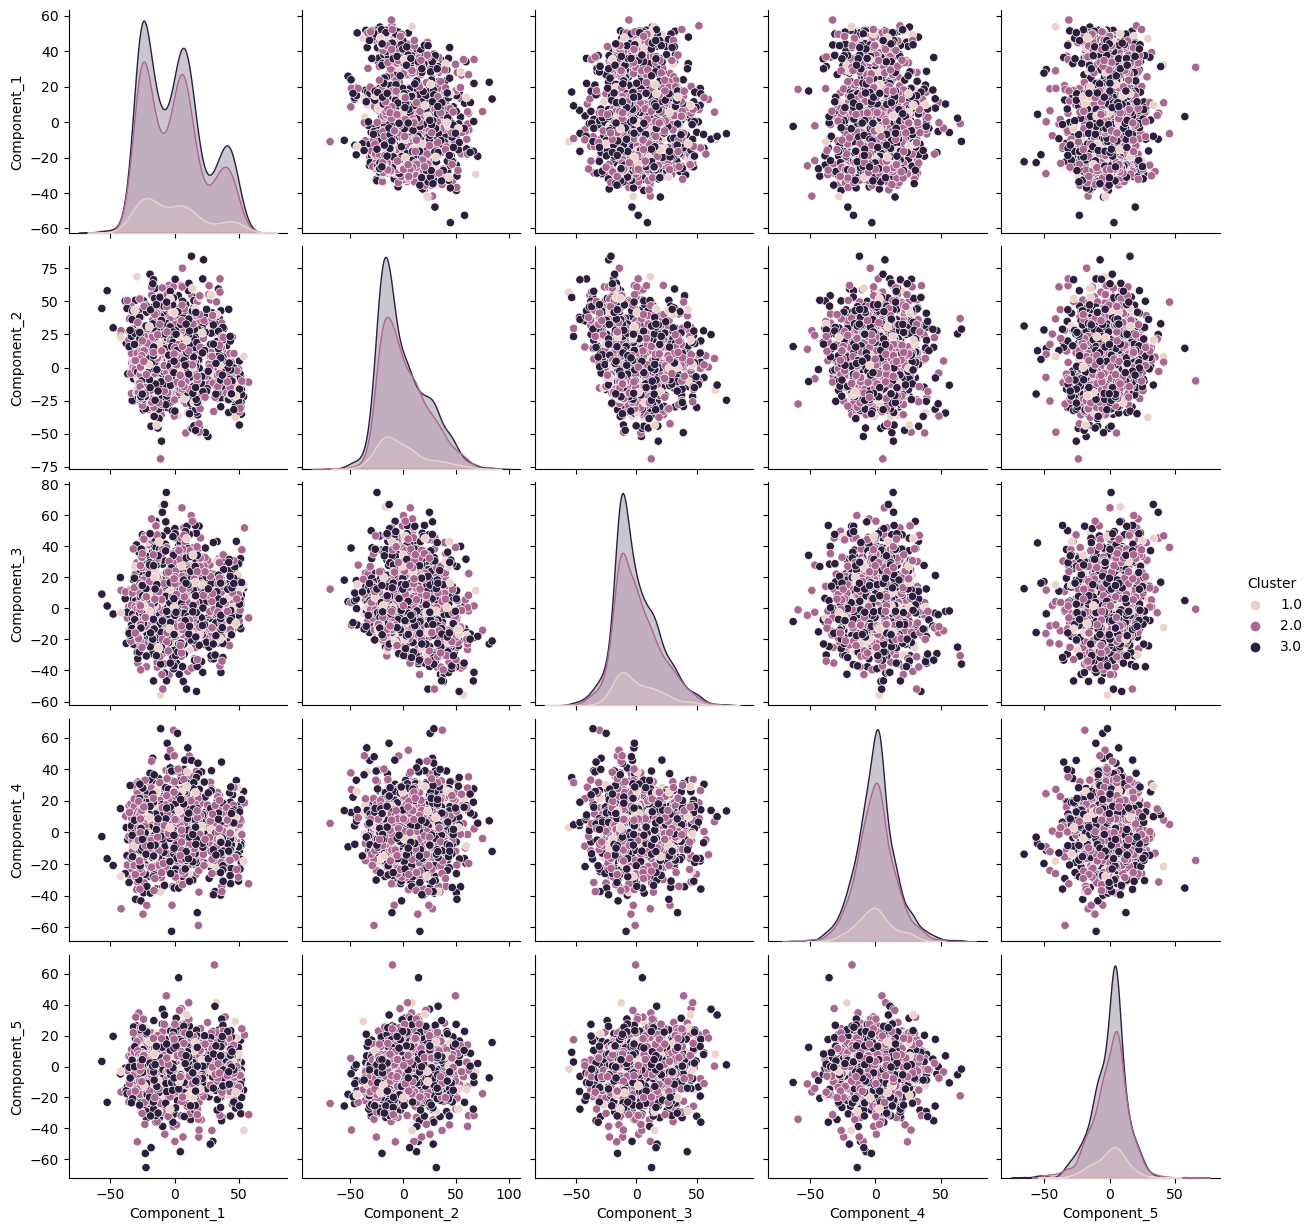

In [29]:
# crea il pairplot
col=['Cluster', 'Component_1', 'Component_2', 'Component_3', 'Component_4',
       'Component_5']
sns.pairplot(data=df_pca_cna[col], hue='Cluster')
plt.show()

In [30]:
df_tot=df_pca_exp.drop('Cluster',axis=1).join(df_pca_cna, lsuffix='_exp', rsuffix='_cna')

In [31]:
df_tot

,Component_1_exp,Component_2_exp,Component_3_exp,Component_4_exp,Component_5_exp,Component_6_exp,Component_7_exp,Component_8_exp,Component_9_exp,Component_10_exp,...,Component_2_cna,Component_3_cna,Component_4_cna,Component_5_cna,Component_6_cna,Component_7_cna,Component_8_cna,Component_9_cna,Component_10_cna,Cluster
MB-7099,-14.892240,-47.169839,25.829264,-5.283838,-19.917553,24.281388,-8.864568,16.230998,-0.494442,-0.753404,...,-4.597807,10.179573,25.645494,2.633169,-23.474928,-3.401347,-27.352997,-22.589077,10.217316,3.0
MB-2848,2.213086,-5.678882,-16.552205,37.788644,6.833745,4.584298,-43.966815,36.340841,8.298014,-27.255346,...,-7.902116,12.105257,-20.971104,0.173907,-7.816659,3.350969,11.028453,-14.330530,17.658275,3.0
MB-0532,-28.618382,13.801140,25.212118,-36.618741,7.731389,11.201433,1.528460,1.237074,12.263060,-11.903536,...,25.073045,6.105383,18.537787,-4.788846,4.722277,-15.625929,-3.267075,-12.906872,2.086144,2.0
MB-4332,109.866968,97.857079,61.144524,55.891935,17.301486,-34.325435,-4.300904,34.225426,-0.033263,23.547398,...,54.859471,-14.646719,2.593948,1.257165,-21.907752,8.884193,2.492750,4.787660,19.342645,2.0
MB-5534,-31.998226,29.373334,-31.015395,-7.950952,7.653251,39.904817,27.281774,-11.156523,17.328771,-10.015756,...,24.978823,-10.285747,-23.080332,8.857857,-6.530174,11.143523,7.259022,-21.974204,-26.262073,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-3272,-31.839220,-2.244202,35.913003,0.899840,-18.078378,24.906667,-24.998007,2.496123,20.887586,4.619687,...,4.826477,-16.804708,-9.968314,-7.419426,-5.167336,8.863285,13.771751,-6.511846,4.076717,3.0
MB-5431,1.171596,48.284802,-33.864106,28.053080,-36.161187,-16.549421,14.490945,-19.409054,-12.187454,19.547557,...,47.561010,-30.489397,1.840883,13.114162,-5.443016,-7.576265,-4.988227,3.234370,-10.742377,3.0
MB-5636,46.958157,-5.129352,33.440455,3.263974,10.959281,-1.024803,6.751803,-11.596691,-18.663602,-6.667344,...,44.022785,29.590902,-11.894279,-3.463597,12.522407,-18.859007,-1.882734,14.367089,4.872630,3.0
MB-7060,17.411542,-34.596557,-9.094348,32.273323,-37.526266,-7.383034,21.401900,-8.563023,16.691881,7.639715,...,-5.752417,-23.901059,-14.698245,-6.613946,-6.314393,-6.560906,-12.411758,-3.325371,2.540175,2.0


Save as numpy

In [32]:
#df_tot.to_csv("/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Input_data/PCA_METABRIC_20cmp.csv",sep=',')

In [33]:
df_tot.Cluster.describe()

count    1892.000000
mean        2.413848
std         0.649190
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Cluster, dtype: float64

# IC10


In [35]:
data_clin_patient=pd.read_csv('/CTGlab/data/brca_metabric/data_clinical_patient.txt',sep='\t',skiprows=4,index_col='PATIENT_ID')
#data_clin_patient.head()

In [36]:
ic10=data_clin_patient['INTCLUST']
ic10.unique()

array(['4ER+', '3', '9', '7', '4ER-', nan, '5', '8', '10', '1', '2', '6'],
      dtype=object)

In [37]:
ic10.replace('4ER+','4',inplace=True)
ic10.replace('4ER.','4',inplace=True)


In [38]:
df_tot_sub=df_tot.join(ic10,how='inner')

In [45]:
df_tot_sub.INTCLUST.unique()

array(['3', '7', '4ER+', '8', '5', '1', '2', '9', '4ER-', '10', '6'],
      dtype=object)

In [39]:
df_tot_sub.rename(columns={'INTCLUST':'IntClustMemb'},inplace=True)

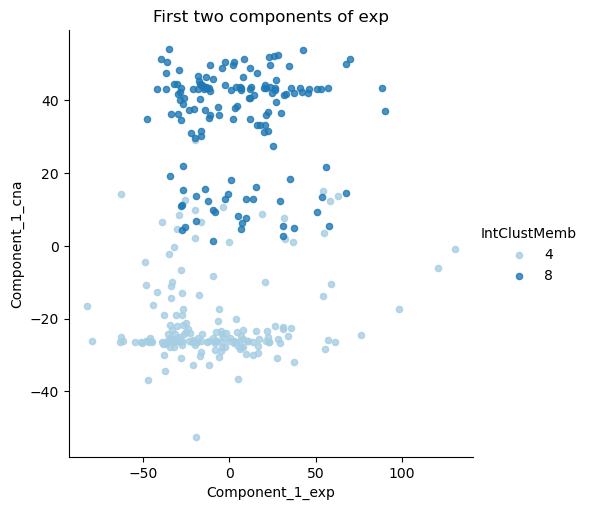

In [35]:
sns.lmplot( x="Component_1_exp", y="Component_1_cna",
    data=df_tot_sub.loc[(df_tot_sub.IntClustMemb == 8) | (df_tot_sub.IntClustMemb == 4)], 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 20}).set(title='First two components of exp')

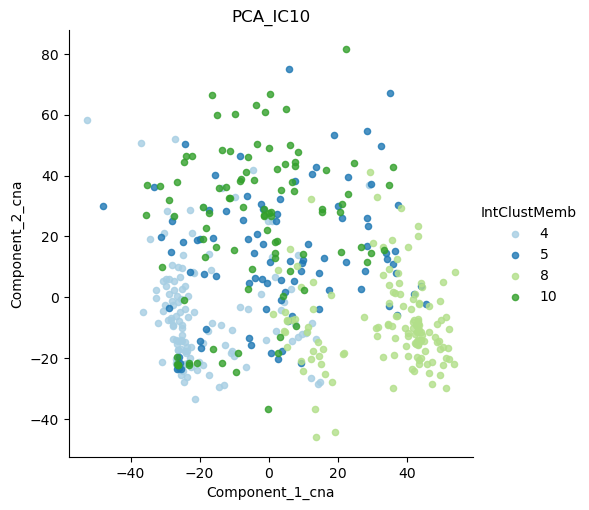

In [36]:
sns.lmplot( x="Component_1_cna", y="Component_2_cna",
    data=df_tot_sub.loc[(df_tot_sub.IntClustMemb == 8) | (df_tot_sub.IntClustMemb == 10)| (df_tot_sub.IntClustMemb == 4)| (df_tot_sub.IntClustMemb == 5)], 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 20}).set(title='PCA_IC10')

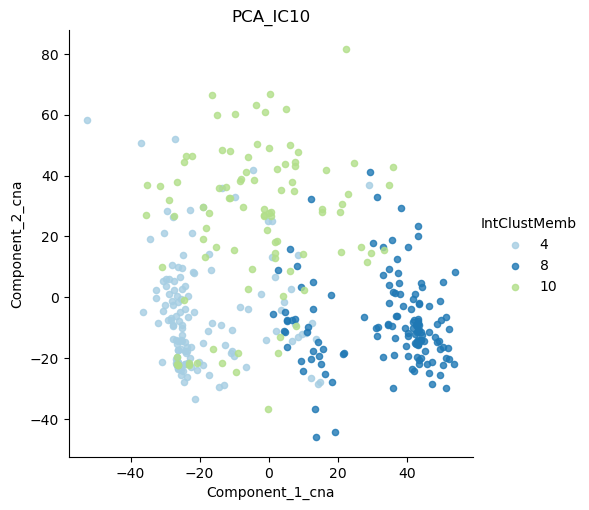

In [37]:
sns.lmplot( x="Component_1_cna", y="Component_2_cna",
    data=df_tot_sub.loc[(df_tot_sub.IntClustMemb == 8) | (df_tot_sub.IntClustMemb == 10)| (df_tot_sub.IntClustMemb == 4)], 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 20}).set(title='PCA_IC10')

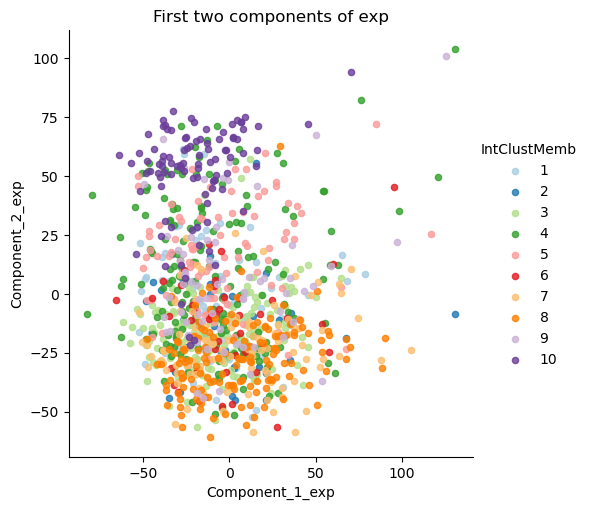

In [38]:
sns.lmplot( x="Component_1_exp", y="Component_2_exp",
    data=df_tot_sub, 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 20}).set(title='First two components of exp')

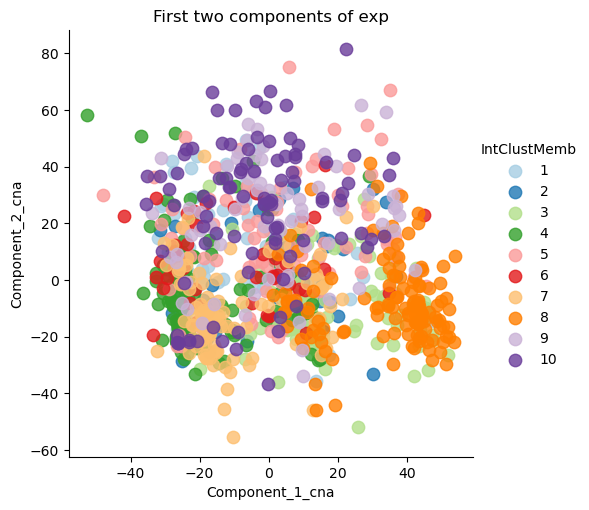

In [39]:
sns.lmplot( x="Component_1_cna", y="Component_2_cna",
    data=df_tot_sub, 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 80}).set(title='First two components of exp')

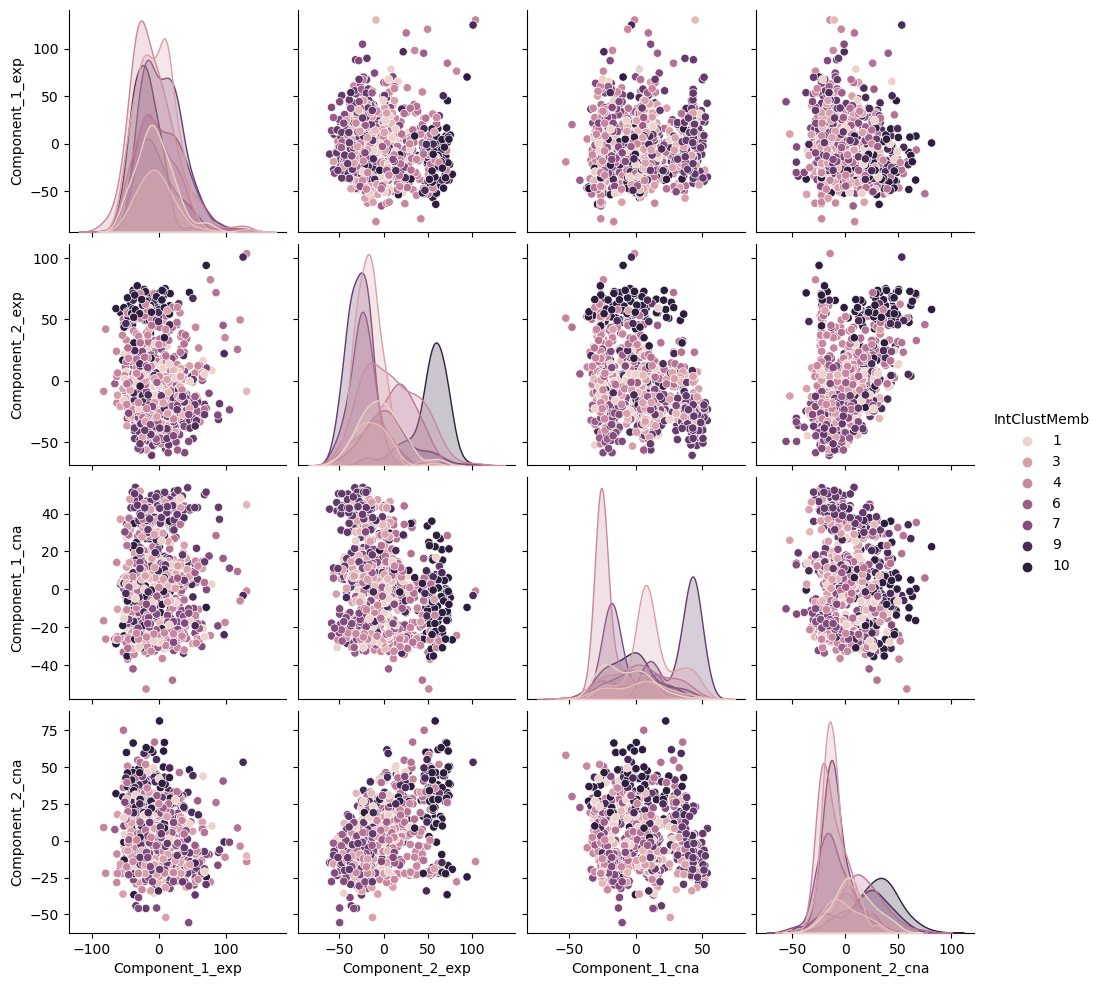

In [40]:
# crea il pairplot
col=['IntClustMemb', 'Component_1_exp', 'Component_2_exp', 'Component_1_cna', 'Component_2_cna']
sns.pairplot(data=df_tot_sub[col], hue='IntClustMemb')
plt.show()

In [41]:
#save ic10
df_tot_sub.to_csv('./PCA_METABRIC_20cmp_IC10_full.csv',sep=',')

In [54]:
from sklearn.model_selection import train_test_split
features=[]
n_qubits=2
for i in range(1,n_qubits+1):
    name_cna='Component_'+str(i)+'_cna'
    name_exp='Component_'+str(i)+'_exp'
    features.append(name_cna)
    features.append(name_exp)
labels = 'IntClustMemb'
# df_tot_sel=data_input.loc[(data_input.IntClustMemb == 8) | 
#                           (data_input.IntClustMemb == 10)| 
#                           (data_input.IntClustMemb == 4)|
#                           (data_input.IntClustMemb == 5)]

#Extract data and Split train and test
X_train, X_test, y_train, y_test = train_test_split(df_tot_sub[features],df_tot_sub[labels],
                                                    train_size=0.6,test_size=0.4,
                                                    random_state=89,stratify=df_tot_sub[labels])
      

In [55]:
#scale data for Quantum algorithm -> 0-2pi
#train
tr_size=70
ts_size=70
X_train['Class']=y_train
g_tr = X_train.groupby('Class')
print("Train class dist:")
print(g_tr.size())
samp_size_tr=min(tr_size,g_tr.size().min())
#X_train= pd.DataFrame(g_tr.apply(lambda x: x.sample(tr_size,random_state=89)))
X_train= pd.DataFrame(g_tr.apply(lambda x: x.sample(samp_size_tr,random_state=89)))
print(type(X_train))
y_train=X_train['Class'].droplevel(level='Class')
X_train=X_train[features].droplevel(level='Class')

#test
X_test['Class']=y_test
g_ts = X_test.groupby('Class')
print("Test class dist:")
print(g_ts.size())
samp_size_ts=min(ts_size,g_ts.size().min())
#X_test= pd.DataFrame(g_ts.apply(lambda x: x.sample(ts_size,random_state=89)))
X_test= pd.DataFrame(g_ts.apply(lambda x: x.sample(samp_size_ts,random_state=89)))
y_test=X_test['Class'].droplevel(level='Class')
X_test=X_test[features].droplevel(level='Class')

y_train= y_train.to_numpy()
y_test= y_test.to_numpy()


scaler = MinMaxScaler(feature_range = (0, 2*np.pi))
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train class dist:
Class
1      46
2      27
3      94
4     100
5      56
6      26
7      65
8      86
9      40
10     58
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Test class dist:
Class
1     30
2     18
3     62
4     67
5     38
6     18
7     44
8     57
9     27
10    38
dtype: int64


In [50]:
type(X_train_scaled)

numpy.ndarray

In [56]:
np.save('../QUASK/X_train.npy',X_train_scaled)
np.save('../QUASK/y_train.npy',y_train)
np.save('../QUASK/X_test.npy',X_test_scaled)
np.save('../QUASK/y_test.npy',y_test)

#                              CLASSICAL SVM PIPELINE                 

In [81]:
df_tot_sel=df_tot_sub.loc[(df_tot_sub.IntClustMemb == 8) | 
                          (df_tot_sub.IntClustMemb == 10)| 
                          (df_tot_sub.IntClustMemb == 4)|
                          (df_tot_sub.IntClustMemb == 5)]
features=[ 'Component_1_exp', 'Component_2_exp', 'Component_1_cna', 'Component_2_cna']
labels='IntClustMemb'
#Extract data and Split train and test
X_train, X_test, y_train, y_test = train_test_split(df_tot_sel[features],df_tot_sel[labels],
                                                    train_size=0.8,test_size=0.2,
                                                    random_state=89,stratify=df_tot_sel[labels])
            


In [63]:
normal_svc = SVC(kernel = "rbf")
normal_svc.fit(X_train, y_train)
#Test SVC
y_test_pred=normal_svc.predict(X_test)
print ('accuracy score: %0.3f' % accuracy_score(y_test, y_test_pred))
C=confusion_matrix(y_true=y_test,y_pred=y_test_pred)
print('printing confusion matrix:')
print(C)

#Train SVC
y_train_pred=normal_svc.predict(X_train)
print ('accuracy score: %0.3f' % accuracy_score(y_train, y_train_pred))
C=confusion_matrix(y_true=y_train,y_pred=y_train_pred)
print('printing confusion matrix:')
print(C)

accuracy score: 0.790
printing confusion matrix:
[[29  1  0  3]
 [ 8  9  1  1]
 [ 0  2 27  0]
 [ 2  2  1 14]]
accuracy score: 0.810
printing confusion matrix:
[[113   9   4   8]
 [ 20  42   9   4]
 [  0   5 108   1]
 [  6  10   0  61]]


In [82]:
X_train

,Component_1_exp,Component_2_exp,Component_1_cna,Component_2_cna
MB-4721,31.470132,-29.391574,41.307176,-3.928255
MB-5068,60.925718,-33.603924,-26.363297,-21.364277
MB-0619,-25.313407,-0.243302,-23.548660,-17.606828
MB-4667,54.910369,43.713914,3.492697,-4.171741
MB-5022,7.984675,-12.977695,0.654809,-18.145972
...,...,...,...,...
MB-4745,0.641015,43.622805,-18.802334,7.747837
MB-5350,-0.309957,29.520648,1.010602,25.187436
MB-5349,21.300091,-20.444508,-26.086717,-22.394780
MB-0641,-31.906868,11.889883,-26.322184,-22.099787


In [83]:
X_train['Class']=y_train
g_tr = X_train.groupby('Class')
print(g_tr.size())
X_train= pd.DataFrame(g_tr.apply(lambda x: x.sample(10,replace=True)))
#X_train= pd.DataFrame(g_tr.apply(lambda x: x.sample(g_tr.min()).reset_index(drop=True)))
#y_train=X_train['Class']
#X_train=X_train[:-1]


Class
4     134
5      75
8     114
10     77
dtype: int64


In [84]:
X_train[features].droplevel(level='Class')

,Component_1_exp,Component_2_exp,Component_1_cna,Component_2_cna
MB-5590,-5.083923,-10.759209,-28.876577,6.199346
MB-0192,-34.399577,31.398705,-25.625127,6.555930
MB-0223,-3.890721,-13.351525,-25.081194,-14.464687
MB-3479,-26.952507,22.599768,-21.703717,8.099117
MB-5068,60.925718,-33.603924,-26.363297,-21.364277
MB-0893,-46.663951,55.380562,-26.337141,-21.997359
MB-0294,4.097764,30.287374,-20.159755,-21.315932
MB-2845,-25.574898,6.283611,12.577622,-8.493619
MB-0906,3.338239,56.201195,-26.372505,-22.182774
MB-0519,-34.560881,30.424873,-27.810044,26.542018


In [87]:
X_train['Class'].droplevel(level='Class')


MB-5590     4
MB-0192     4
MB-0223     4
MB-3479     4
MB-5068     4
MB-0893     4
MB-0294     4
MB-2845     4
MB-0906     4
MB-0519     4
MB-2847     5
MB-5120     5
MB-5318     5
MB-0643     5
MB-2847     5
MB-0373     5
MB-5166     5
MB-0643     5
MB-5417     5
MB-2964     5
MB-0439     8
MB-5472     8
MB-4735     8
MB-5654     8
MB-4709     8
MB-5121     8
MB-2954     8
MB-0384     8
MB-3008     8
MB-0356     8
MB-0375    10
MB-5511    10
MB-2953    10
MB-5294    10
MB-5076    10
MB-4694    10
MB-0313    10
MB-4938    10
MB-3476    10
MB-0455    10
Name: Class, dtype: int64